<h1><center><b>Machine Learning</></center></h1>
<h4><center>89-511</center></h4>
<h3><center>Exercise 1 - Practical Part</center></h3>

Your Name:  
<font color='red'>
Itay Etelis, 209041474   
</font>


____________

In this exercise we will learn to:
1. Load and prepare datasets.
2. Implement KNN algorithm.

**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure all the cells run without errors.
- When you finish the assignment, download the notebook and submit it and your pdf file to the **"submit"** system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  



If you have questions, please ask at the forum on moodle.

Personal requests please send to TA emails.

### **1. Introduction to Colab and Numpy**

We use the Python programming language for all assignments in this course with the help of popular packages (like numpy, matplotlib, sklearn, scipy and pytorch).

Go over this **[numpy tutorial](https://numpy.org/doc/stable/user/quickstart.html)** or this **[tutorial](https://cs231n.github.io/python-numpy-tutorial/)** before starting this assignment and **[this notebook](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb)** to understand how to work with basic packages and with Google Colab. It is important to go over them before starting this assignment.

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline

Play with NumPy here:

In [ ]:
x = np.array([1,2,3])
y = np.array([4,5,6])
x, y

(array([1, 2, 3]), array([4, 5, 6]))

Pay attention: with NumPy, you can sum vectors in one line, you don't have to iterate over the elements.

In [ ]:
x + y
# x - y
# x * y
# x**2
# (x - y)**2

array([5, 7, 9])

In [ ]:
np.sum(x)
# np.mean(x)
np.sqrt(x)

array([1.        , 1.41421356, 1.73205081])

### **2. Data**

##Data
We'll use CIFAR10 dataset.
It is a very familiar dataset. Please read a little bit [here](https://www.cs.toronto.edu/~kriz/cifar.html).

To import the dataset, we'll use the torch library. Don't dig about this library now, we will learn about it better in the next weeks.

In [ ]:
import torch
from torchvision import datasets,transforms
import torchvision

In [ ]:
######################################################
##   Don't change this cell. Use it as a black box  ##
######################################################

transform = transforms.Compose(
    [transforms.ToTensor(),
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=1)

# CIFAR10 labels:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let's see a few images with their labels

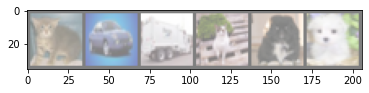

  cat   car truck   cat   dog   dog


In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

testiter = iter(testloader)
test_images, test_labels = testiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:6]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))

Each image is represented as a RGB image.
each pixel has a number between 0 and 1 on each dimension.

In [ ]:
images[0], images[0].size()

(tensor([[[0.2824, 0.2941, 0.3137,  ..., 0.4078, 0.4039, 0.3882],
          [0.2980, 0.3098, 0.3294,  ..., 0.4235, 0.4157, 0.4039],
          [0.3137, 0.3255, 0.3451,  ..., 0.4353, 0.4157, 0.4078],
          ...,
          [0.4353, 0.4627, 0.4157,  ..., 0.6392, 0.6235, 0.6157],
          [0.4000, 0.4196, 0.4549,  ..., 0.6392, 0.6235, 0.6196],
          [0.4196, 0.4196, 0.4314,  ..., 0.6392, 0.6196, 0.5882]],
 
         [[0.4706, 0.4824, 0.4980,  ..., 0.5843, 0.5804, 0.5765],
          [0.4863, 0.4980, 0.5137,  ..., 0.5961, 0.5922, 0.5882],
          [0.5059, 0.5137, 0.5333,  ..., 0.6196, 0.6196, 0.6078],
          ...,
          [0.4039, 0.4196, 0.3686,  ..., 0.6078, 0.5961, 0.5882],
          [0.3765, 0.3804, 0.4118,  ..., 0.6000, 0.5882, 0.5843],
          [0.4000, 0.3882, 0.3961,  ..., 0.5961, 0.5804, 0.5490]],
 
         [[0.6275, 0.6353, 0.6510,  ..., 0.7255, 0.7216, 0.7137],
          [0.6392, 0.6471, 0.6627,  ..., 0.7255, 0.7294, 0.7255],
          [0.6471, 0.6549, 0.6745,  ...,

CIFAR is a big datadset, let's use only 100 images and convert them to numpy arrays

#### Train Set

In [ ]:
x_train = np.array(images)
y_train = np.array(labels)

In [ ]:
x_train.shape, y_train.shape

((100, 3, 32, 32), (100,))

#### Test Set

In [ ]:
x_test = np.array(test_images)
y_test = np.array(test_labels)
x_test.shape, y_test.shape

((100, 3, 32, 32), (100,))

### **3. KNN**

First of all, let's implement euclidean distance function, so we will be able to calculate closeness between images.

**A reminder**: the euclidean distance formula is:

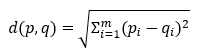

**Pay attention**: point representation might contains more than two numbers (means m>2).

In [ ]:
def euclidean_distance(p1, p2):
  return np.linalg.norm(p1 - p2)

Now, let's implement KNeighborsClassifier class.

In 'fit' function you have to get the inputs, and prepare the classifier for prediction (think what exactly you have to prepare)

In 'predict' fucntion you have to get a test set and return a numpy array contains the classes (that the model predicted) of each element from the test set.

We added a few more function declarations that might help you. Fill free to implement them (or not) and to add some more functions.

In adition, we've presented a few KNN implementations in class. You are allowed to implement your own algorithm.


In [ ]:
from collections import OrderedDict

class KNeighborsClassifier:
  """
  KNN Algorithm, flatten each image into 1d vector and store with label.
  for each prediction calculate the distance from every photo in the space and 
  choose apropriate class.
  """
  def __init__(self, distance_metric=euclidean_distance, n_neighbors=None):
    self.k = n_neighbors
    # store all flatten images in the fit stage.
    self.images_demantional_space = []
    self.distance_metric = distance_metric


  def fit(self, x, y):
    for idx, img in enumerate(x):
      # flatten image into 1d vector.
      flatten_img = img.flatten()
      label = y[idx]
      # store tuple (image, label) into space.
      self.images_demantional_space.append((flatten_img, label))

  def predict(self, x_test):
    # create a (1, x_test_size) array of predicted lables.
    ret_np_array = np.empty(shape=(x_test.shape[0]))

    for idx, img in enumerate(x_test):
      img_vec = img.flatten()
      # add predicted label to array.
      ret_np_array[idx] = self._nearest_neighbor(img_vec)

    return ret_np_array

  def _distance_vector(self, img_vec):
    # initialize new dictionary mapping each distance to label. (distance vector)
    dv = {}
    for (vec, label) in self.images_demantional_space:
      # for each vector in space calculate the distance from the img_vec and store in dictionary.
      dv[self.distance_metric(img_vec, vec)] = label

    # return only the k closest neihbors to img_vec, return only the labels.
    return list(OrderedDict(sorted(dv.items())).values())[:self.k]


  def _nearest_neighbor(self, img_vec):
    dv = self._distance_vector(img_vec)
    # return the most common label in dv vec.
    return max(set(dv), key=dv.count)


In [ ]:
def error_rate(y_predict, y_true):
  """
  y_predict: the model's output
  y_true: the expected output
  """
  return np.mean(y_predict != y_true)
  

**Using KNN**

Use the KNeighborsClassifier class you've implemented with n_neighbors=1. Fit this KNN model to the training data.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

**Predictions and Evaluations**

Use the predict method to predict values using your KNN model and x_test. In addition, create a [confusion matrix](https://www.sciencedirect.com/topics/engineering/confusion-matrix) and a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Make sure you don't get any errors in this cell.

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

              precision    recall  f1-score   support

           0       0.25      0.30      0.27        10
           1       0.00      0.00      0.00         6
           2       0.17      0.50      0.25         8
           3       0.18      0.20      0.19        10
           4       0.17      0.14      0.15         7
           5       0.80      0.50      0.62         8
           6       0.42      0.31      0.36        16
           7       0.25      0.18      0.21        11
           8       0.33      0.38      0.36        13
           9       0.20      0.09      0.13        11

    accuracy                           0.27       100
   macro avg       0.28      0.26      0.25       100
weighted avg       0.29      0.27      0.27       100



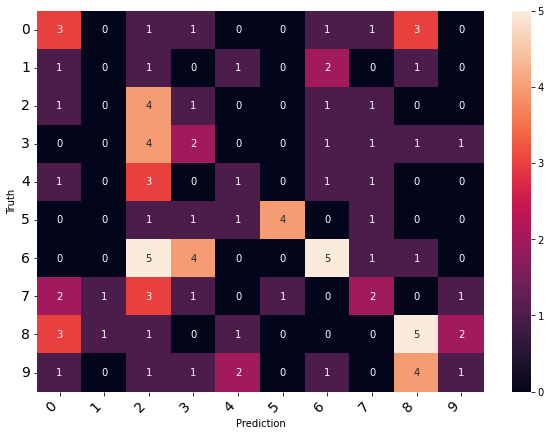

In [ ]:
pred = knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print_confusion_matrix(confusion_matrix(y_test,pred), [0,1,2,3,4,5,6,7,8,9])
print(classification_report(y_test,pred))

**Choosing a K Value**

Implement a for loop in 'find_best_k' function (hint: use KNeighborsClassifier object) that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.
The function will return the best k, and the error rate of each k as a numpy array.

In [ ]:
MIN_K = 1
MAX_K = 15

def find_best_k(min_k=1, max_k=15):
  err_rates = []
  best_err = 1
  best_k = 0
  for k in range(min_k, max_k, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)

    curr_error = error_rate(pred, y_test)
    err_rates.append(curr_error)
    if best_err > curr_error:
      best_err = curr_error
      best_k = k

  return (best_k, err_rates)
  


  

In [ ]:
best_k, error_rate = find_best_k(min_k=MIN_K, max_k=MAX_K)

Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error rate')

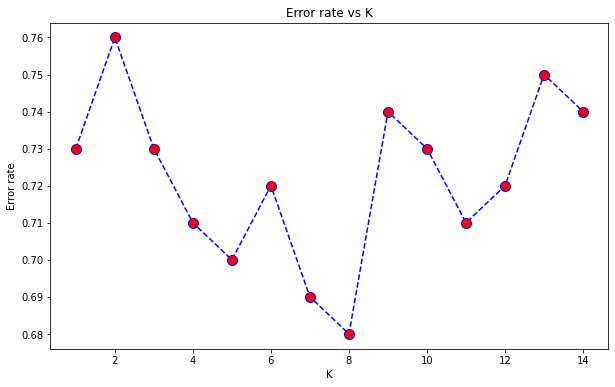

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(MIN_K,MAX_K),error_rate,color='blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

**Retrain with new K Value**

Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

              precision    recall  f1-score   support

           0       0.29      0.60      0.39        10
           1       0.00      0.00      0.00         6
           2       0.23      0.62      0.33         8
           3       0.25      0.20      0.22        10
           4       1.00      0.14      0.25         7
           5       0.67      0.25      0.36         8
           6       0.38      0.56      0.45        16
           7       0.33      0.09      0.14        11
           8       0.38      0.38      0.38        13
           9       0.50      0.09      0.15        11

    accuracy                           0.32       100
   macro avg       0.40      0.29      0.27       100
weighted avg       0.40      0.32      0.29       100



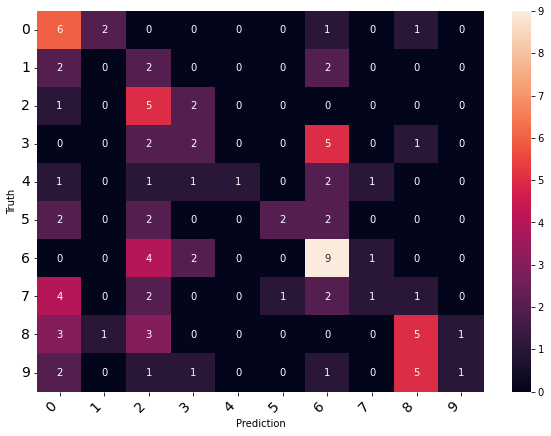

In [ ]:
print_confusion_matrix(confusion_matrix(y_test,pred), [0,1,2,3,4,5,6,7,8,9])
print(classification_report(y_test,pred))

**:)**